In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pylamp.neural.activations import Softmax
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.optim.optimizer import Optim
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps, show_usps
from pylamp.utils.plotter import Display

In [3]:
def plot_loss(losses):
    epochs = range(1, len(losses) + 1)
    plt.plot(epochs, losses, label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def print_accuracy(model,X_test,y_test):
    y_pred = np.argmax(model.forward(X_test),axis=1)
    accuracy = np.sum(y_test == y_pred)/len(y_test)
    print(f'Accuracy = {accuracy}')

## Loading Data

In [4]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

def normalize_data(X, mean=None, std=None):
    if mean is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, mean, std = normalize_data(X_train)
X_test,  _ , _ = normalize_data(X_test, mean, std)

Label:  6
x size:  256


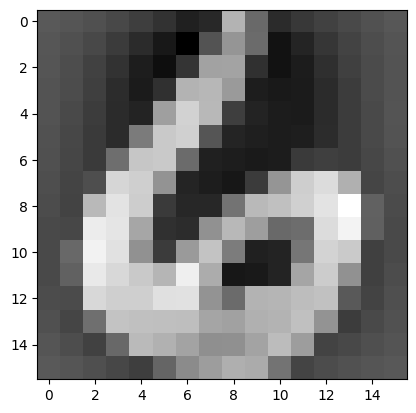

In [5]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Testing Multi Class Model

In [6]:
num_classes = 10

### One hot encode label

In [7]:
y_train_one_hot = np.eye(num_classes)[y_train]

In [8]:
y_train_one_hot[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

## Sequential with a single linear layer

In [9]:
sequential_model = Sequential()

# no need for softmax activation because it is included in the loss function
sequential_model.add_module(Linear(input_size=256, output_size=10))

loss_func = CrossEntropyLoss()
optimizer = Optim(sequential_model,loss_func,1e-5)
batch_size = 256
epochs = 500

sequential_model_losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)

Epoch 1/500, Average Loss: 3.530097193092673
Epoch 51/500, Average Loss: 2.7576818519372224
Epoch 101/500, Average Loss: 2.347549643344887
Epoch 151/500, Average Loss: 2.113074014668137
Epoch 201/500, Average Loss: 1.9807598958746908
Epoch 251/500, Average Loss: 1.9110065972566244
Epoch 301/500, Average Loss: 1.8661010109677296
Epoch 351/500, Average Loss: 1.8353502279879275
Epoch 401/500, Average Loss: 1.815038459330996
Epoch 451/500, Average Loss: 1.799442011920954
Training finished.


Accuracy = 0.6711509715994021


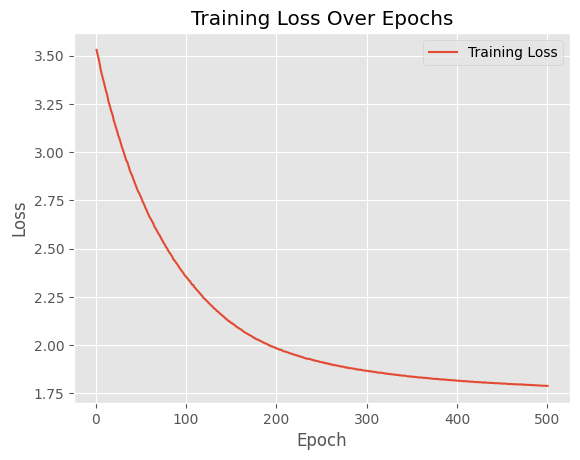

In [10]:
print_accuracy(sequential_model,X_test,y_test)
Display.plot_loss(sequential_model_losses)

## Linear Module

In [11]:
model_linear = Linear(input_size=256, output_size=10)
loss_func = CrossEntropyLoss()

optimizer_linear = Optim(model_linear,loss_func,1e-5)

batch_size = 256
epochs = 500

model_linear_losses = SGD(optimizer_linear,X_train, y_train_one_hot, batch_size,epochs,verbose=True)

Epoch 1/500, Average Loss: 3.047676693582237
Epoch 51/500, Average Loss: 2.424773752650304
Epoch 101/500, Average Loss: 2.1495108867288155
Epoch 151/500, Average Loss: 2.0116472006171118
Epoch 201/500, Average Loss: 1.9341732763741954
Epoch 251/500, Average Loss: 1.884666730866563
Epoch 301/500, Average Loss: 1.848324218345466
Epoch 351/500, Average Loss: 1.825104196265684
Epoch 401/500, Average Loss: 1.8089807701865355
Epoch 451/500, Average Loss: 1.7970418852135097
Training finished.


Accuracy = 0.6656701544593921


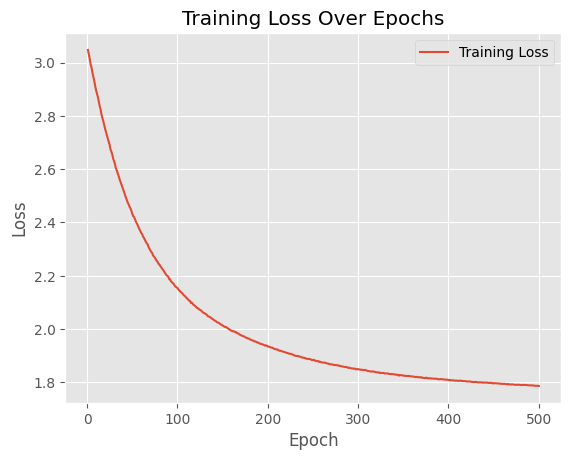

In [12]:
print_accuracy(model_linear,X_test,y_test)
Display.plot_loss(model_linear_losses)